# Mapping Hospitals & Medial Centers in LA City
### by Mariana Estrada
### 
### Data sources: Hospitals & Medical Centers - County of LA Enterprise GIS (eGIS) Hub 

In [1]:
# Importing Geo pandas so I can use the library of functions to clean and plot my spatial data
import pandas as pd
import geopandas as gpd

In [2]:
# Importing Matplotlib and Contextily so I can use different tiles for my basemap and functions so I can plot my data
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# Importing my data set on hospitals and medical centers in LA County from the County of LA Enterprise GIS (eGIS) Hub
# Using pd since it is in tabular form
# Naming my data frame "data"
data=pd.read_csv("week_4_data/Hospitals_and_Medical_Centers.csv")

In [4]:
# Exploring data
# I want to know the type of data I have
type(data)

pandas.core.frame.DataFrame

In [5]:
# Exploring data
# I want to see the fields in my data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             165 non-null    float64
 1   Y             165 non-null    float64
 2   OBJECTID      165 non-null    int64  
 3   source        143 non-null    object 
 4   ext_id        13 non-null     object 
 5   cat1          165 non-null    object 
 6   cat2          165 non-null    object 
 7   cat3          110 non-null    object 
 8   org_name      82 non-null     object 
 9   Name          165 non-null    object 
 10  addrln1       163 non-null    object 
 11  addrln2       11 non-null     object 
 12  city          163 non-null    object 
 13  state         163 non-null    object 
 14  hours         158 non-null    object 
 15  phones        164 non-null    object 
 16  url           155 non-null    object 
 17  info1         10 non-null     object 
 18  info2         3 non-null      

In [6]:
# Exploring data
# I want to see some of my records
data.head()

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y
0,-118.216024,34.204530,9,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Verdugo Hills Hospital,...,91208.0,http://egis3.lacounty.gov/lms/?p=560,publish,34.204530,-118.216023,2016/01/29 10:45:00+00,NaN,NaN,6.496353e+06,1.896883e+06
1,-118.248312,34.075693,11,211,NaN,Health and Mental Health,Hospitals and Medical Centers,Respiratory Hospital,NaN,Barlow Respiratory Hospital - Los Angeles (Mai...,...,90026.0,http://egis3.lacounty.gov/lms/?p=561,publish,34.075693,-118.248312,2016/01/21 15:56:47+00,NaN,NaN,6.486475e+06,1.850019e+06
2,-117.865075,34.127307,20,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Glendora Community Hospital,...,91740.0,http://egis3.lacounty.gov/lms/?p=568,publish,34.127307,-117.865075,2016/01/22 14:39:39+00,NaN,NaN,6.602504e+06,1.868737e+06
3,-118.357113,33.838634,25,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,Providence Little Company of Mary Medical Center,Providence Little Company Of Mary Medical Cent...,...,90503.0,http://egis3.lacounty.gov/lms/?p=569,publish,33.838634,-118.357113,2016/01/27 11:34:40+00,NaN,NaN,6.453221e+06,1.763848e+06
4,-118.257443,34.128058,35,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Glendale Memorial Hospital And Health Center,...,91204.0,http://egis3.lacounty.gov/lms/?p=570,publish,34.128058,-118.257443,2016/01/22 16:10:02+00,NaN,NaN,6.483758e+06,1.869083e+06


In [7]:
# Exploring data
# I want to see more the last records in my data set
data.tail()

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y
160,-118.396943,34.023195,71348,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
161,-118.396943,34.023195,71349,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
162,-118.396943,34.023195,71350,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Southern California Hospital at Culver City,...,90232.0,http://egis3.lacounty.gov/lms/?p=80733,publish,34.023195,-118.396943,2016/02/02 13:21:01+00,NaN,NaN,6.441390e+06,1.831059e+06
163,-118.325144,34.096445,71351,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,Southern California Hospital at Hollywood,...,90028.0,http://egis3.lacounty.gov/lms/?p=80738,publish,34.096445,-118.325144,2016/02/03 11:38:45+00,NaN,NaN,6.463232e+06,1.857638e+06
164,-118.325144,34.096445,71352,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Southern California Hospital at Hollywood,...,90028.0,http://egis3.lacounty.gov/lms/?p=80738,publish,34.096445,-118.325144,2016/02/03 11:38:45+00,NaN,NaN,6.463232e+06,1.857638e+06


In [8]:
# Exploring data
# I want to see a random sample of 10
data.sample(10)

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,zip,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y
145,-117.967521,34.063033,71330,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,Kindred Hospital,Kindred Hospital - Baldwin Park,...,91706.0,http://egis3.lacounty.gov/lms/?p=80707,publish,34.063033,-117.967521,2016/02/01 14:17:08+00,NaN,NaN,6.571507e+06,1.845321e+06
103,-118.532994,34.220347,3776,HSIP Freedom Airports_Heliports,CA86,Health and Mental Health,Hospitals and Medical Centers,NaN,US Geological Survey (USGS) & LA County,Northridge Hospital Medical Center,...,91328.0,http://egis3.lacounty.gov/lms/?p=4585,publish,34.220347,-118.532994,2016/02/01 16:24:56+00,NaN,NaN,6.400545e+06,1.902996e+06
64,-118.100636,34.015015,1278,211,NaN,Health and Mental Health,Hospitals and Medical Centers,STEMI,NaN,Beverly Hospital,...,90640.0,http://egis3.lacounty.gov/lms/?p=1258,publish,34.015015,-118.100636,2016/01/21 17:00:56+00,NaN,NaN,6.531173e+06,1.827860e+06
68,-118.628579,34.202699,1288,211,NaN,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,NaN,West Hills Hospital and Medical Center,...,91307.0,http://egis3.lacounty.gov/lms/?p=1261,publish,34.202699,-118.628579,2016/01/29 11:41:14+00,NaN,NaN,6.371610e+06,1.896740e+06
152,-118.362450,34.057449,71340,NaN,NaN,Health and Mental Health,Hospitals and Medical Centers,Acute Care,NaN,Miracle Mile Medical Center,...,90036.0,http://egis3.lacounty.gov/lms/?p=80718,publish,34.057449,-118.362450,2016/02/01 16:00:03+00,NaN,NaN,6.451887e+06,1.843485e+06
112,-118.212809,34.039659,25788,HSIP Freedom Gnis_structures,1732699,Health and Mental Health,Hospitals and Medical Centers,NaN,Promise Hospital,Promise Hospital of East Los Angeles,...,90033.0,http://egis3.lacounty.gov/lms/?p=28183,publish,34.039659,-118.212809,2016/01/27 11:21:36+00,NaN,NaN,6.497198e+06,1.836881e+06
114,-117.917007,34.087231,26433,HSIP Freedom Gnis_structures,1724329,Health and Mental Health,Hospitals and Medical Centers,NaN,LA County,Covina Valley Community Hospital,...,NaN,http://egis3.lacounty.gov/lms/?p=28871,publish,34.087231,-117.917007,2016/01/22 12:33:52+00,NaN,NaN,6.586799e+06,1.854136e+06
19,-118.265746,34.037364,67,211,NaN,Health and Mental Health,Hospitals and Medical Centers,EDAP-PMC,Catholic Healthcare West,California Hospital Medical Center,...,90015.0,http://egis3.lacounty.gov/lms/?p=574,publish,34.037364,-118.265746,2016/01/21 17:29:05+00,NaN,NaN,6.481158e+06,1.836084e+06
56,-117.944874,34.071396,1251,211,NaN,Health and Mental Health,Hospitals and Medical Centers,NaN,NaN,West Covina Medical Center,...,91790.0,http://egis3.lacounty.gov/lms/?p=1251,publish,34.071396,-117.944874,2016/01/22 13:21:20+00,NaN,NaN,6.578365e+06,1.848367e+06
109,-118.138315,34.049413,24800,HSIP Freedom Gnis_structures,1732541,Health and Mental Health,Hospitals and Medical Centers,911 Receiving,AHMC Healthcare,Monterey Park Hospital,...,91754.0,http://egis3.lacounty.gov/lms/?p=27162,publish,34.049413,-118.138315,2016/01/25 17:00:38+00,NaN,NaN,6.519772e+06,1.840392e+06


In [9]:
# Exploring data
# I want to know how may rows and columns there are
data.shape

(165, 31)

In [10]:
# Exploring data
# I want to know how many unique hospitals and medical centers there are in LA County
data['Name'].value_counts()

Cedars-Sinai Medical Center           9
California Hospital Medical Center    7
Antelope Valley Hospital              5
Centinela Hospital Medical Center     5
Beverly Hospital                      5
                                     ..
East Los Angeles Doctors Hospital     1
Coast Plaza Doctors Hospital          1
Catalina Island Medical Center        1
West Covina Medical Center            1
Glendale Adventist Medical Center     1
Name: Name, Length: 117, dtype: int64

In [11]:
# Preparing data
# Converting df to gdf
# My data set doesn't have a geometry so I will create a column where both x and y are included
gdf = gpd.GeoDataFrame(data,
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(data.X, data.Y))

In [12]:
# I want to see my new "Geomrety" field
print(gdf)

              X          Y  OBJECTID source ext_id                      cat1  \
0   -118.216024  34.204530         9    211    NaN  Health and Mental Health   
1   -118.248312  34.075693        11    211    NaN  Health and Mental Health   
2   -117.865075  34.127307        20    211    NaN  Health and Mental Health   
3   -118.357113  33.838634        25    211    NaN  Health and Mental Health   
4   -118.257443  34.128058        35    211    NaN  Health and Mental Health   
..          ...        ...       ...    ...    ...                       ...   
160 -118.396943  34.023195     71348    NaN    NaN  Health and Mental Health   
161 -118.396943  34.023195     71349    NaN    NaN  Health and Mental Health   
162 -118.396943  34.023195     71350    NaN    NaN  Health and Mental Health   
163 -118.325144  34.096445     71351    NaN    NaN  Health and Mental Health   
164 -118.325144  34.096445     71352    NaN    NaN  Health and Mental Health   

                              cat2     

In [13]:
# I want to review the cordinate system
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Trimming the data
# I will review my data again
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X             165 non-null    float64 
 1   Y             165 non-null    float64 
 2   OBJECTID      165 non-null    int64   
 3   source        143 non-null    object  
 4   ext_id        13 non-null     object  
 5   cat1          165 non-null    object  
 6   cat2          165 non-null    object  
 7   cat3          110 non-null    object  
 8   org_name      82 non-null     object  
 9   Name          165 non-null    object  
 10  addrln1       163 non-null    object  
 11  addrln2       11 non-null     object  
 12  city          163 non-null    object  
 13  state         163 non-null    object  
 14  hours         158 non-null    object  
 15  phones        164 non-null    object  
 16  url           155 non-null    object  
 17  info1         10 non-null     object  
 18  in

In [15]:
# I will now trim my data
gdf[['source', 'cat3', 'Name', 'addrln1', 'city', 'hours', 'description', 'zip', 'geometry', 'X', 'Y']]

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
2,211,911 Receiving,Glendora Community Hospital,150 W. Route 66,Glendora,24 hours a day,Services provided include comprehensive acute ...,91740.0,POINT (-117.86507 34.12731),-117.865075,34.127307
3,211,911 Receiving,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,Torrance,24 hours a day 7 days at week,Providence Little Company of Mary Medical Cent...,90503.0,POINT (-118.35711 33.83863),-118.357113,33.838634
4,211,911 Receiving,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,Glendale,"Monday through Friday, 9:00am to 5:00pm. Emer...","Established in 1926, Glendale Memorial Hospita...",91204.0,POINT (-118.25744 34.12806),-118.257443,34.128058
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
161,NaN,911 Receiving,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
162,NaN,Acute Care,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
163,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445


In [16]:
# I will now declare the trim verion as a new variable
gdf_trimmed=gdf[['source', 'cat3', 'Name', 'addrln1', 'city', 'hours', 'description', 'zip', 'geometry', 'X', 'Y']]

In [17]:
gdf_trimmed.head()

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
2,211,911 Receiving,Glendora Community Hospital,150 W. Route 66,Glendora,24 hours a day,Services provided include comprehensive acute ...,91740.0,POINT (-117.86507 34.12731),-117.865075,34.127307
3,211,911 Receiving,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,Torrance,24 hours a day 7 days at week,Providence Little Company of Mary Medical Cent...,90503.0,POINT (-118.35711 33.83863),-118.357113,33.838634
4,211,911 Receiving,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,Glendale,"Monday through Friday, 9:00am to 5:00pm. Emer...","Established in 1926, Glendale Memorial Hospita...",91204.0,POINT (-118.25744 34.12806),-118.257443,34.128058


In [18]:
# I want a random sample of my data set
gdf_trimmed.sample(10)

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
32,211,911 Receiving,Pacifica Hospital Of The Valley,9449 San Fernando Rd.,Sun Valley,24 hours a day\r\nGeneral Visiting Hours 11:0...,"Pacifica Hospital of the Valley, a 231 bed acu...",91352.0,POINT (-118.39620 34.24015),-118.396204,34.240153
162,NaN,Acute Care,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
75,211,NaN,Kindred Hospital - San Gabriel Valley,845 N. Lark Ellen Ave.,West Covina,NaN,Kindred Hospitals are a part of Kindred Health...,91791.0,POINT (-117.91725 34.08707),-117.917246,34.087068
17,211,Trauma Center,California Hospital Medical Center,1401 S. Grand Ave.,Los Angeles,24 hours a day.,The medical center provides comprehensive hosp...,90015.0,POINT (-118.26575 34.03736),-118.265746,34.037364
133,211,NaN,Urdc Human Services Corporation - Bill Moore C...,1460 N Lake Ave,Pasadena,"Monday, 9:00am to 1:00pm for children, 5:00pm ...",The agency provides health services for to low...,91104.0,POINT (-118.13161 34.17124),-118.131607,34.171239
94,211,911 Receiving,Alhambra Hospital Medical Center,100 S. Raymond Ave.,Alhambra,Hospital is open 24 hours\r\nOther services av...,"Alhambra Hospital Medical Center, a 144-bed ge...",91801.0,POINT (-118.14397 34.09020),-118.143969,34.090201
114,HSIP Freedom Gnis_structures,NaN,Covina Valley Community Hospital,NaN,NaN,NaN,NaN,NaN,POINT (-117.91701 34.08723),-117.917007,34.087231
158,LA County Department of Health Services,911 Receiving,San Dimas Community Hospital,"1350 W Covina Blvd,",San Dimas,"24 hours a day, 7 days a week.",<strong>San Dimas Community Hospital</strong> ...,91773.0,POINT (-117.83466 34.09761),-117.834659,34.097612
105,HSIP Freedom Airports_Heliports,Acute Care,Northridge Hospital Medical Center,18300 Roscoe Blvd.,Northridge,24 hour emergency services,"<span style=""font-family: Calibri"">Nobody know...",91328.0,POINT (-118.53299 34.22035),-118.532994,34.220347


In [19]:
# Querying the data
# I want to see how many unique values there are "city"
gdf_trimmed['city'].value_counts()

Los Angeles         52
Long Beach           9
Lancaster            6
Montebello           5
Inglewood            5
Baldwin Park         4
Pasadena             4
West Covina          4
Glendale             3
Culver City          3
San Dimas            3
Whittier             3
Northridge           3
Pomona               3
Downey               2
San Gabriel          2
Monterey Park        2
Alhambra             2
Encino               2
Palmdale             2
Norwalk              2
Hollywood            2
Santa Monica         2
Glendora             2
Torrance             2
Panorama City        2
Van Nuys             2
Covina               2
Chino Hills          1
San Pedro            1
South El Monte       1
City of Commerce     1
Lincoln Heights      1
Sun Valley           1
North Hills          1
San Fernando         1
Monrovia             1
La Mirada            1
Harbor City          1
Avalon               1
Gardena              1
Tarzana              1
Paramount            1
Duarte     

In [20]:
# Querying the data
# I want to see the records that have hospitals in Los Angeles
gdf_trimmed.loc[gdf_trimmed['city']=='Los Angeles']

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
5,211,Trauma Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
6,211,911 Receiving,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
7,211,EDAP-PMC,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
8,211,Acute Care,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
9,211,Base Hospital,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
10,211,Disaster Resource Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
11,211,STEMI,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
12,211,Stroke,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
13,211,Perinatal,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219


In [21]:
# Querying the data
# I want to see the records that have hospitals in Inglewood
gdf_trimmed.loc[gdf_trimmed['city']=='Inglewood']

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
87,211,911 Receiving,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
88,211,EDAP-PMC,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
89,211,Respiratory Hospital,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
90,211,Perinatal,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783
91,211,Rehabilitation,Centinela Hospital Medical Center,555 E. Hardy St.,Inglewood,"Monday through Friday, 9:00am to 5:00pm; emerg...","As the only hospital located in Inglewood, Cal...",90301.0,POINT (-118.34826 33.95078),-118.348257,33.950783


<AxesSubplot: >

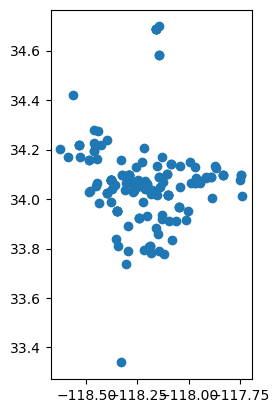

In [22]:
# Plotting to see my data set - even tho I have a geometry - I just want to see
gdf_trimmed.plot()

In [23]:
# Cleaning data
# Checking for null columns
gdf_trimmed.columns[gdf_trimmed.isna().all()].tolist()

[]

In [24]:
# I will look at the data again to see how I want to keep cleaning it
gdf_trimmed.head(1000)

,source,cat3,Name,addrln1,city,hours,description,zip,geometry,X,Y
0,211,911 Receiving,Verdugo Hills Hospital,1812 Verdugo Blvd.,Glendale,Administrative hours are Monday through Friday...,The facility provides health education and hos...,91208.0,POINT (-118.21602 34.20453),-118.216024,34.204530
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
2,211,911 Receiving,Glendora Community Hospital,150 W. Route 66,Glendora,24 hours a day,Services provided include comprehensive acute ...,91740.0,POINT (-117.86507 34.12731),-117.865075,34.127307
3,211,911 Receiving,Providence Little Company Of Mary Medical Cent...,4101 Torrance Blvd.,Torrance,24 hours a day 7 days at week,Providence Little Company of Mary Medical Cent...,90503.0,POINT (-118.35711 33.83863),-118.357113,33.838634
4,211,911 Receiving,Glendale Memorial Hospital And Health Center,1420 S. Central Ave.,Glendale,"Monday through Friday, 9:00am to 5:00pm. Emer...","Established in 1926, Glendale Memorial Hospita...",91204.0,POINT (-118.25744 34.12806),-118.257443,34.128058
...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
161,NaN,911 Receiving,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
162,NaN,Acute Care,Southern California Hospital at Culver City,3828 Delmas Ter,Culver City,"24 hours a day, 7 days a week.","<p class=""paragraph_style_6"">From the day it o...",90232.0,POINT (-118.39694 34.02320),-118.396943,34.023195
163,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445


In [25]:
# I will now rename my columns
gdf_trimmed.columns=['Source',
                     'Type',
                     'Hospital_Name',
                     'Address',
                     'City',
                     'Hours',
                     'Description',
                     'Zip_Code',
                     'Geometry',
                     'Long',
                     'Lat']

In [26]:
# I will review my new columns
gdf_trimmed.sample(5)

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
152,NaN,Acute Care,Miracle Mile Medical Center,"6000 San Vicente Blvd,",Los Angeles,Mon 6:30 PM to 8:00 PM,Welcome to Miracle Mile Medical Center (MMMC)....,90036.0,POINT (-118.36245 34.05745),-118.362450,34.057449
8,211,Acute Care,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
102,211,911 Receiving,Kaiser Permanente - Los Angeles Medical Center,4867 Sunset Blvd.,Los Angeles,"24 hours, 7 days a week\r\nUrgent Care:\r\n8am...",The medical centers provides 24 hour emergency...,90027.0,POINT (-118.29510 34.09853),-118.295095,34.098532
23,211,Perinatal,California Hospital Medical Center,1401 S. Grand Ave.,Los Angeles,24 hours a day.,The medical center provides comprehensive hosp...,90015.0,POINT (-118.26575 34.03736),-118.265746,34.037364
148,NaN,NaN,College Medical Center,2776 Pacific Avenue,Long Beach,"24 hours a day, 7 days a week.",For acute inpatient services we provide Medica...,90806.0,POINT (-118.19303 33.80731),-118.193031,33.807307


### I will not plot this data set since it has a geometry
### I will also not sort this data set since there isn't a value/number attached to a record

In [28]:
# I am only interested in mapping hospitals in LA City so I will make a new query where City = Los Angeles
gdf_trimmed[gdf_trimmed['City']=='Los Angeles'

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
1,211,Respiratory Hospital,Barlow Respiratory Hospital - Los Angeles (Mai...,2000 Stadium Way,Los Angeles,Administrative hours are Monday through Friday...,For more than a century at Barlow Respiratory ...,90026.0,POINT (-118.24831 34.07569),-118.248312,34.075693
5,211,Trauma Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
6,211,911 Receiving,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
7,211,EDAP-PMC,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
8,211,Acute Care,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
9,211,Base Hospital,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
10,211,Disaster Resource Center,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
11,211,STEMI,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
12,211,Stroke,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219
13,211,Perinatal,Cedars-Sinai Medical Center,8700 Beverly Blvd.,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Cedars-Sinai is one of the largest nonprofit a...,90048.0,POINT (-118.38104 34.07622),-118.381038,34.076219


In [29]:
gdf_trimmed[gdf_trimmed['City']=='Northridge']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
103,HSIP Freedom Airports_Heliports,NaN,Northridge Hospital Medical Center,18300 Roscoe Blvd.,Northridge,24 hour emergency services,"<span style=""font-family: Calibri"">Nobody know...",91328.0,POINT (-118.53299 34.22035),-118.532994,34.220347
104,HSIP Freedom Airports_Heliports,911 Receiving,Northridge Hospital Medical Center,18300 Roscoe Blvd.,Northridge,24 hour emergency services,"<span style=""font-family: Calibri"">Nobody know...",91328.0,POINT (-118.53299 34.22035),-118.532994,34.220347
105,HSIP Freedom Airports_Heliports,Acute Care,Northridge Hospital Medical Center,18300 Roscoe Blvd.,Northridge,24 hour emergency services,"<span style=""font-family: Calibri"">Nobody know...",91328.0,POINT (-118.53299 34.22035),-118.532994,34.220347


In [30]:
gdf_trimmed[gdf_trimmed['City']=='Hollywood']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
163,NaN,NaN,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445
164,NaN,Acute Care,Southern California Hospital at Hollywood,6245 De Longpre Avenue,Hollywood,"5:30am to 7:30pm, Monday through Friday",Welcome to Southern California Hospital at Hol...,90028.0,POINT (-118.32514 34.09645),-118.325144,34.096445


In [31]:
gdf_trimmed[gdf_trimmed['City']=='Sun Valley']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
32,211,911 Receiving,Pacifica Hospital Of The Valley,9449 San Fernando Rd.,Sun Valley,24 hours a day\r\nGeneral Visiting Hours 11:0...,"Pacifica Hospital of the Valley, a 231 bed acu...",91352.0,POINT (-118.39620 34.24015),-118.396204,34.240153


In [32]:
gdf_trimmed[gdf_trimmed['City']=='Van Nuys']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
31,211,Respiratory Hospital,Barlow Hospital At Valley Presbyterian Hospital,15107 Vanowen Blvd.,Van Nuys,24 hours a day,For more than a century at Barlow Respiratory ...,91405.0,POINT (-118.46272 34.19428),-118.462724,34.19428
37,211,911 Receiving,Valley Presbyterian Hospital,15107 Vanowen St.,Van Nuys,"24 hours a day, 7 days at week","Since 1958, Valley Presbyterian Hospital has b...",91405.0,POINT (-118.46305 34.19481),-118.463055,34.19481


In [33]:
gdf_trimmed[gdf_trimmed['City']=='Tarzana']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
92,211,911 Receiving,Providence Tarzana Medical Center,18321 Clark St.,Tarzana,"24 hours a day, 7 days at week","For four decades, Providence Tarzana Medical C...",91356.0,POINT (-118.53227 34.17020),-118.532273,34.170201


In [34]:
gdf_trimmed[gdf_trimmed['City']=='Encino']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
106,LA County Department of Health Services,NaN,Encino Hospital Medical Center,16237 Ventura Boulevard,Encino,NaN,<strong>Encino Hospital Medical Center (EHMC)<...,91436.0,POINT (-118.48673 34.15718),-118.486726,34.157184
107,LA County Department of Health Services,911 Receiving,Encino Hospital Medical Center,16237 Ventura Boulevard,Encino,NaN,<strong>Encino Hospital Medical Center (EHMC)<...,91436.0,POINT (-118.48673 34.15718),-118.486726,34.157184


In [35]:
gdf_trimmed[gdf_trimmed['City']=='Mission Hills']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
66,211,911 Receiving,Providence Holy Cross Medical Center,15031 Rinaldi St.,Mission Hills,24 hours a day 7 days at week,Providence Holy Cross Medical Center offers bo...,91345.0,POINT (-118.46006 34.27995),-118.460056,34.27995


In [36]:
gdf_trimmed[gdf_trimmed['City']=='Woodland Hills']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
41,Current Services Locator,911 Receiving,Kaiser Permanente - Woodland Hills Medical Center,5601 De Soto Ave.,Woodland Hills,"818-719-2000\r\n24 hours, 7 days a week\r\n\r\...",The Medical Centers Provides 24 Hour Emergency...,91365.0,POINT (-118.58989 34.17043),-118.589895,34.170434


In [37]:
gdf_trimmed[gdf_trimmed['City']=='Sherman Oaks']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
77,211,NaN,Sherman Oaks Community Hospital,4929 Van Nuys Blvd.,Sherman Oaks,24 hours a day 7 days at week,<strong>Sherman Oaks Hospital</strong> (SOH) i...,91403.0,POINT (-118.44948 34.16028),-118.449476,34.16028


In [38]:
gdf_trimmed[gdf_trimmed['City']=='Lincoln Heights']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
127,211,NaN,Lincoln Heights Senior Citizen Center,2323 Workman St,Lincoln Heights,"Monday through Friday, 8:00am to 4:00pm.",The center provides a variety of services for ...,90031.0,POINT (-118.21468 34.07259),-118.214685,34.072592


In [39]:
gdf_trimmed[gdf_trimmed['City']=='Sun Valley']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
32,211,911 Receiving,Pacifica Hospital Of The Valley,9449 San Fernando Rd.,Sun Valley,24 hours a day\r\nGeneral Visiting Hours 11:0...,"Pacifica Hospital of the Valley, a 231 bed acu...",91352.0,POINT (-118.39620 34.24015),-118.396204,34.240153


In [40]:
gdf_trimmed[gdf_trimmed['City']=='North Hills']

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
129,211,NaN,Mission City Community Network Inc,15206 Parthenia St,North Hills,,The agency provides health services for people...,91343.0,POINT (-118.46381 34.22810),-118.463813,34.228101


In [67]:
# My new data set only includes values in LA City
# I will now create a variable that holds this query
LA_City_Hospitals = gdf_trimmed[(gdf_trimmed['City'] == 'Los Angeles') | (gdf_trimmed['City'] == 'Northridge') | (gdf_trimmed['City'] == 'North Hills') | (gdf_trimmed['City'] == 'Sun Valley') | (gdf_trimmed['City'] == 'Lincoln Heights') | (gdf_trimmed['City'] == 'Sherman Oaks') | (gdf_trimmed['City'] == 'Woodland Hills') | (gdf_trimmed['City'] == 'Mission Hills') | (gdf_trimmed['City'] == 'Encino') | (gdf_trimmed['City'] == 'Tarzana') | (gdf_trimmed['City'] == 'Van Nuys') | (gdf_trimmed['City'] == 'Sun Valley') | (gdf_trimmed['City'] == 'Hollywood')] 

In [68]:
# I will now review my new data variable
LA_City_Hospitals.sample(10)

,Source,Type,Hospital_Name,Address,City,Hours,Description,Zip_Code,Geometry,Long,Lat
126,211,NaN,Queenscare Family Clinics - East Los Angeles,133 N Sunol Dr,Los Angeles,"Monday through Friday, 8:00am to 5:00pm.",The clinics provide health services for low-in...,90063.0,POINT (-118.17842 34.03738),-118.178424,34.037376
37,211,911 Receiving,Valley Presbyterian Hospital,15107 Vanowen St.,Van Nuys,"24 hours a day, 7 days at week","Since 1958, Valley Presbyterian Hospital has b...",91405.0,POINT (-118.46305 34.19481),-118.463055,34.194810
151,NaN,NaN,Miracle Mile Medical Center,"6000 San Vicente Blvd,",Los Angeles,Mon 6:30 PM to 8:00 PM,Welcome to Miracle Mile Medical Center (MMMC)....,90036.0,POINT (-118.36245 34.05745),-118.362450,34.057449
26,211,Disaster Resource Center,Children's Hospital Los Angeles,4650 Sunset Blvd,Los Angeles,"Monday through Friday, 8:00am to 5:00pm. Emer...",Children's Hospital Los Angeles (CHLA) is a 50...,90027.0,POINT (-118.29101 34.09802),-118.291013,34.098019
31,211,Respiratory Hospital,Barlow Hospital At Valley Presbyterian Hospital,15107 Vanowen Blvd.,Van Nuys,24 hours a day,For more than a century at Barlow Respiratory ...,91405.0,POINT (-118.46272 34.19428),-118.462724,34.194280
155,NaN,911 Receiving,Saint Vincent Medical Center,2131 West Third Street,Los Angeles,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,St. Vincent Medical Center is committed to imp...,90057.0,POINT (-118.27365 34.06382),-118.273655,34.063818
156,NaN,Acute Care,Saint Vincent Medical Center,2131 West Third Street,Los Angeles,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,St. Vincent Medical Center is committed to imp...,90057.0,POINT (-118.27365 34.06382),-118.273655,34.063818
77,211,NaN,Sherman Oaks Community Hospital,4929 Van Nuys Blvd.,Sherman Oaks,24 hours a day 7 days at week,<strong>Sherman Oaks Hospital</strong> (SOH) i...,91403.0,POINT (-118.44948 34.16028),-118.449476,34.160280
33,211,911 Receiving,Los Angeles Metropolitan Medical Center,2231 S. Western Ave.,Los Angeles,24 hours a day,The medical center provides hospital services ...,90018.0,POINT (-118.30925 34.03545),-118.309250,34.035448
154,NaN,NaN,Saint Vincent Medical Center,2131 West Third Street,Los Angeles,GENERAL ACUTE CARE\r\n8:30 a.m. – 8:30 p.m.,St. Vincent Medical Center is committed to imp...,90057.0,POINT (-118.27365 34.06382),-118.273655,34.063818


### I will now begin mapping!

In [69]:
# Importing folium since I forgot to do this earlier :p
import folium

In [70]:
# Starting a default map
m=folium.Map(),
m

(<folium.folium.Map at 0x7feb3afc6080>,)

In [71]:
# Calculating the long and lat which is located in my original data set "data"
latitude=LA_City_Hospitals.Lat.mean()
longitude=LA_City_Hospitals.Long.mean()

In [72]:
# I want to see my longitude
longitude

-118.33304696263573

In [73]:
# I wany to see my latitude
latitude

34.08151401759005

In [74]:
# I will now bring the folium in with arguments
m=folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
m

In [75]:
# I will now add markers to represent the hospitals in LA City
# There are are 52 records so I will use loops
for index, row in LA_City_Hospitals.iterrows():
    folium.Marker([row.Lat, row.Long],
                  icon=folium.Icon(color="green"),
                  popup = row.Hospital_Name,
                 ).add_to(m)
m

In [76]:
# I will now add a title using code I found online
# Folium doesn't have a function for adding a title so it requires HTML 
for index, row in LA_City_Hospitals.iterrows():
    m = folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
    title_html = '''<h3 align="center" style="font-size:20px"><b>Hospitals in LA City</b></h3>'''
    m.get_root().html.add_child(folium.Element(title_html))

m

In [77]:
# using read_file
# using same projection as data
# had the move the folder containing data in here for code to work

Cooling_Centers = gpd.read_file('cooling_data/Cooling_Heating_Centers_City_of_Los_Angeles.geojson')

In [78]:
Cooling_Centers.sample()

,X,Y,OBJECTID,GlobalID,FacilityName,IndoorOutdoor,Address,Bureau,CouncilDistrict,AltFacPhone,geometry
29,-118.267521,33.956176,126,1431be44-0382-4a9b-ae13-4f73525e59b8,Green Meadows,Indoor,"431 E 89th St, Los Angeles, CA 90003",South,09,None,POINT (-118.26752 33.95618)


In [79]:
# I will now make hospital specific markers
# I will also add in my cooling layer

for index, row in LA_City_Hospitals.iterrows():
    m = folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
    title_html = '''<h3 align="center" style="font-size:20px"><b>Hospitals in LA City</b></h3>'''
    m.get_root().html.add_child(folium.Element(title_html))

m

for index, row in LA_City_Hospitals.iterrows():
    folium.Marker([row.Lat, row.Long],
                  icon=folium.Icon(color='red', icon='fa-thin fa-hospital', prefix='fa'),
                  popup = row.Hospital_Name
                 ).add_to(m)

m4=folium.FeatureGroup(name='Hospitals & Medical Centers').add_to(m)

for index, row in Cooling_Centers.iterrows():    
    folium.Marker([row.Y, row.X],
                  icon=folium.Icon(color='blue', icon='cloud', prefix='fa'),
                  popup = row.FacilityName
                 ).add_to(m)

m3=folium.FeatureGroup(name='Cooling Centers').add_to(m)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)

m

In [80]:
# Uploading city boundary

LA_city = gpd.read_file('cooling_data/City_Boundary.geojson')

In [81]:
# Reviwing data
LA_city.sample()

,OBJECTID,CITY,geometry
0,1,IN,"POLYGON ((-118.42000 34.32917, -118.41999 34.3..."


In [82]:
folium.GeoJson('cooling_data/City_Boundary.geojson').add_to(m)

m

In [83]:
for index, row in LA_City_Hospitals.iterrows():
    m = folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
    title_html = '''<h3 align="center" style="font-size:20px"><b>Hospitals in LA City</b></h3>'''
    m.get_root().html.add_child(folium.Element(title_html))

m

for index, row in LA_City_Hospitals.iterrows():
    folium.Marker([row.Lat, row.Long],
                  icon=folium.Icon(color='red', icon='fa-thin fa-hospital', prefix='fa'),
                  popup = row.Hospital_Name
                 ).add_to(m)

m4=folium.FeatureGroup(name='Hospitals & Medical Centers').add_to(m)

for index, row in Cooling_Centers.iterrows():    
    folium.Marker([row.Y, row.X],
                  icon=folium.Icon(color='blue', icon='cloud', prefix='fa'),
                  popup = row.FacilityName
                 ).add_to(m)

m3=folium.FeatureGroup(name='Cooling Centers').add_to(m)

folium.GeoJson(LA_city["geometry"]).add_to(m)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)

m

In [84]:
for index, row in LA_City_Hospitals.iterrows():
    m = folium.Map(location=[latitude, longitude],
             tiles='CartoDB positron',
             attribution='CartoDB')
    title_html = '''<h3 align="center" style="font-size:20px"><b>Hospitals in LA City</b></h3>'''
    m.get_root().html.add_child(folium.Element(title_html))

m

for index, row in LA_City_Hospitals.iterrows():
    folium.Marker([row.Lat, row.Long],
                  icon=folium.Icon(color='red', icon='fa-thin fa-hospital', prefix='fa'),
                  popup = row.Hospital_Name
                 ).add_to(m)

m4=folium.FeatureGroup(name='Hospitals & Medical Centers').add_to(m)

for index, row in Cooling_Centers.iterrows():    
    folium.Marker([row.Y, row.X],
                  icon=folium.Icon(color='blue', icon='cloud', prefix='fa'),
                  popup = row.FacilityName
                 ).add_to(m)

m3=folium.FeatureGroup(name='Cooling Centers').add_to(m)

folium.GeoJson(LA_city["geometry"]).add_to(m)

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)

m